# KKO Exploring

In [36]:
# imports
import numpy as np

from matplotlib import pyplot as plt

from frb.dm import igm
from frb.figures import utils as fig_utils

from zdm.chime import grids
from zdm import misc_functions

from astropy.cosmology import Planck18

# Load CHIME grids

In [2]:
dmvals, zvals, all_rates, all_singles, all_reps, state = grids.load()

/home/xavier/Projects/FRB/zdm/zdm/data/Surveys/CHIME/
Loading survey: CHIME_decbin_0_of_6
Loading survey: CHIME_decbin_0_of_6 from CHIME_decbin_0_of_6.ecsv
Loaded FRB info
FRB survey sucessfully initialised with  4  FRBs starting from 0
Initialised surveys
Initializing igamma_spline for gamma=-1.01
Initializing igamma_spline for gamma=-0.375
Initializing igamma_spline for gamma=-1.375
Initialised grids
Loaded dec bin  0
Loaded repeat grid
Loading survey: CHIME_decbin_1_of_6
Loading survey: CHIME_decbin_1_of_6 from CHIME_decbin_1_of_6.ecsv
Loaded FRB info
FRB survey sucessfully initialised with  23  FRBs starting from 0
Initialised surveys
Initialised grids
Loaded dec bin  1
Loaded repeat grid
Loading survey: CHIME_decbin_2_of_6
Loading survey: CHIME_decbin_2_of_6 from CHIME_decbin_2_of_6.ecsv
Loaded FRB info
FRB survey sucessfully initialised with  154  FRBs starting from 0
Initialised surveys
Initialised grids
Loaded dec bin  2
Loaded repeat grid
Loading survey: CHIME_decbin_3_of_6
Lo

## State

In [3]:
state

{
    "FRBdemo": {
        "alpha_method": 1,
        "lC": 1,
        "sfr_n": 0.73,
        "source_evolution": 0
    },
    "IGM": {
        "logF": -0.494850021680094
    },
    "MW": {
        "DMhalo": 50,
        "ISM": 35.0,
        "halo_method": 0,
        "sigmaDMG": 0.5
    },
    "analysis": {
        "NewGrids": true,
        "sprefix": "Std"
    },
    "cosmo": {
        "H0": 67.66,
        "Omega_b": 0.04897,
        "Omega_b_h2": 0.0224178568132,
        "Omega_k": 0.0,
        "Omega_lambda": 0.6888463055445441,
        "Omega_m": 0.30966,
        "fix_Omega_b_h2": true
    },
    "energy": {
        "alpha": 0.65,
        "gamma": -1.01,
        "lEmax": 41.4,
        "lEmin": 30,
        "luminosity_function": 2
    },
    "host": {
        "lmean": 2.18,
        "lsigma": 0.48
    },
    "rep": {
        "RC": 2.3056905047392317e-10,
        "RE0": 1e+39,
        "Rgamma": -2.375,
        "lRmax": 1.0,
        "lRmin": -3.0
    },
    "scat": {
        "Sfnorm": 6

/home/xavier/Projects/FRB/zdm/zdm/misc_functions.py:2693: RuntimeWarning: divide by zero encountered in log10
  zDMgrid = np.log10(zDMgrid)


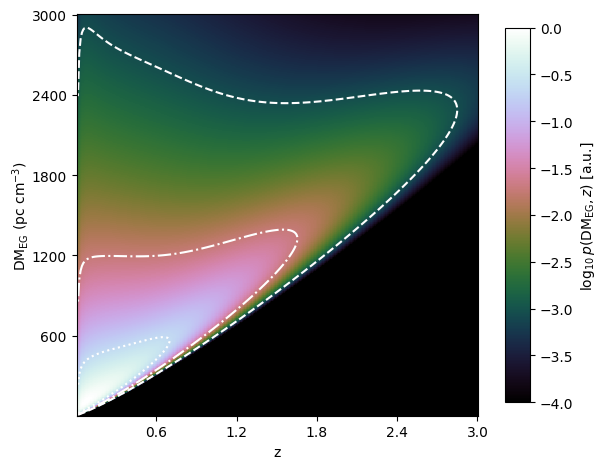

In [11]:
misc_functions.plot_grid_2(all_singles,zvals,dmvals,
                           save=False, showplot=True,
                           norm=3,log=True,
                label='$\\log_{10} p({\\rm DM}_{\\rm EG},z)$ [a.u.]',
                project=False,Aconts=[0.01,0.1,0.5],
                zmax=3.0,DMmax=3000)

# Calculate <DM_EG> vs. z

## Normalize to unit probability 

In [14]:
all_singles = all_singles / np.sum(all_singles)

In [15]:
all_singles.shape

(500, 1400)

In [16]:
zvals.size

500

## Calculate $<DM_{EG}>$

In [20]:
avg_DMEG = []
for ii in range(zvals.size):
    aDMEG = np.sum(all_singles[ii,:] * dmvals) / np.sum(all_singles[ii,:])
    avg_DMEG.append(aDMEG)

## Plot

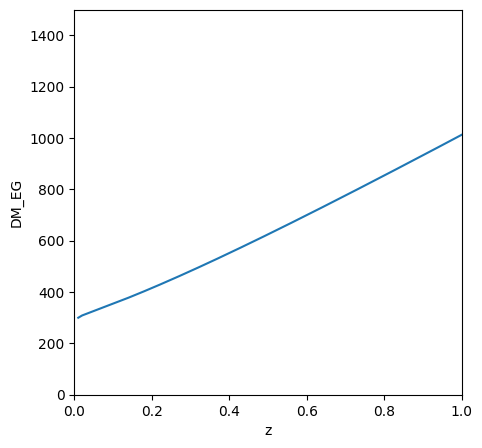

In [23]:
fig = plt.figure(figsize=(5,5))
ax= plt.gca()
ax.plot(zvals, avg_DMEG)
#
ax.set_xlabel('z')
ax.set_ylabel('DM_EG')
ax.set_xlim(0., 1.)
ax.set_ylim(0., 1500.)
#
plt.show()

## What's the "right" answer?

## Calculate $<DM_{\rm cosmic}>$

## Set the cosmology right -- It is Planck18

In [24]:
state.cosmo

CosmoParams(H0=np.float64(67.66), Omega_k=0.0, Omega_lambda=np.float64(0.6888463055445441), Omega_m=0.30966, Omega_b=0.04897, Omega_b_h2=np.float64(0.0224178568132), fix_Omega_b_h2=True)

In [28]:
Planck18.Om0, Planck18.H0

(0.30966, <Quantity 67.66 km / (Mpc s)>)

In [35]:
DM_cosmic, z_cosmic = igm.average_DM(zvals[-1], cosmo=Planck18, neval=zvals.size+1, cumul=True)
DM_cosmic = DM_cosmic[1:]

## Update plot

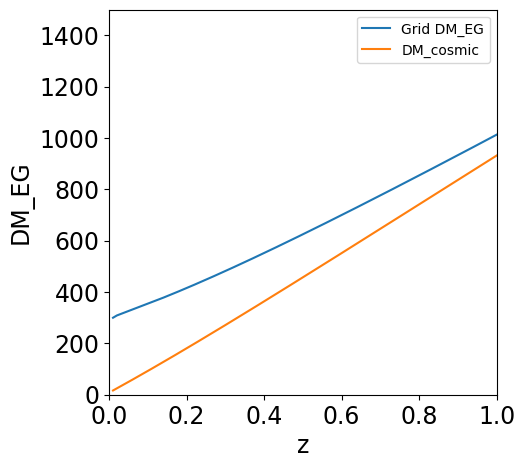

In [39]:
fig = plt.figure(figsize=(5,5))
ax= plt.gca()
#
ax.plot(zvals, avg_DMEG, label='Grid DM_EG')
ax.plot(zvals, DM_cosmic, label='DM_cosmic')
#
ax.set_xlabel('z')
ax.set_ylabel('DM_EG')
ax.set_xlim(0., 1.)
ax.set_ylim(0., 1500.)
#
ax.legend()
#
fig_utils.set_fontsize(ax, 17.)
#
plt.show()

## DM_host -- fussin with factors of log10

In [42]:
state.host

HostParams(lmean=2.18, lsigma=0.48)

In [43]:
logmean = state.host.lmean / 0.4342944619
logsigma = state.host.lsigma / 0.4342944619

## Mean

In [45]:
mean_host = np.exp(logmean + logsigma**2/2.)
mean_host

np.float64(278.77763378581045)

## Plot

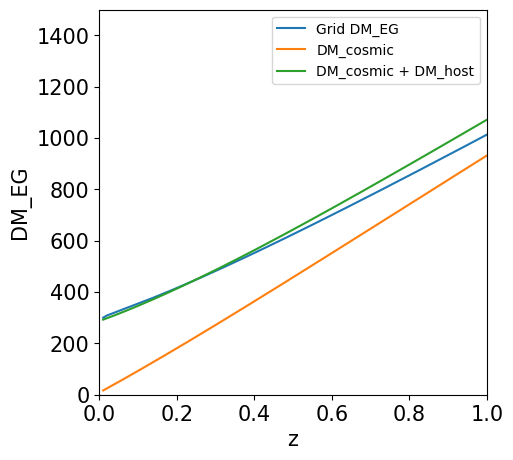

In [49]:
fig = plt.figure(figsize=(5,5))
ax= plt.gca()
#
ax.plot(zvals, avg_DMEG, label='Grid DM_EG')
ax.plot(zvals, DM_cosmic, label='DM_cosmic')
ax.plot(zvals, DM_cosmic.value+mean_host/(1+zvals), label='DM_cosmic + DM_host')
#
ax.set_xlabel('z')
ax.set_ylabel('DM_EG')
ax.set_xlim(0., 1.)
ax.set_ylim(0., 1500.)
#
ax.legend()
#
fig_utils.set_fontsize(ax, 15.)
#
plt.show()